# Exercise
Apply a decision tree to the "adult" dataset and visualize it.

Tune parameters with grid-search; try at least max_leaf_nodes and max_depth, but separately.

Visualize the resulting tree and it's feature importances.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Himanshu Agarwal\Desktop\Python programs\ML using Python Microsoft\day4\day4\data\adult.csv")
df.head()

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.drop_duplicates(keep='first',inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   gender          32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.7+ MB


In [11]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [12]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [13]:
#Now that we've cleaned our data, let's start with DecisionTreeModelling

In [14]:
#We have to predict on basis of provided information if income<=50k or income>50k

In [15]:
#We can never train a model with string/object data. We need data in numeric datatype to train a model.
#In this case, we have data of string datatype.
#First we have to convert it to numeric labels using Label encoding.
#We'll use LabelEncoder library to do so.

In [16]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df = df.apply(lb.fit_transform)

In [17]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,7,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,9,12,2,10,5,2,0,0,0,39,5,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df[['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country']]
y = df['income']


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
#  'stratify' parameter is specified in train_test_split() to deal with unbalanced data. i.e. stratify=label

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
param_grid = {'max_depth':range(1,len(x.columns))}

In [24]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=StratifiedShuffleSplit(10))

In [25]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=None,
            train_size=None),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
           

In [26]:
grid_search.best_params_

{'max_depth': 10}

In [27]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
grid_search.cv_results_

{'mean_fit_time': array([0.01130002, 0.01621287, 0.02054579, 0.02479594, 0.02918568,
        0.03406501, 0.04031079, 0.04241238, 0.04380214, 0.04808135,
        0.05223336, 0.05547194]),
 'std_fit_time': array([0.00749088, 0.00343086, 0.00087266, 0.00343936, 0.00133092,
        0.00467048, 0.00068279, 0.00307816, 0.00382388, 0.002992  ,
        0.003179  , 0.00437659]),
 'mean_score_time': array([0.00176165, 0.00050235, 0.0012116 , 0.00061214, 0.00120327,
        0.0013181 , 0.00020301, 0.00100911, 0.00081587, 0.0020148 ,
        0.00121362, 0.        ]),
 'std_score_time': array([0.00463665, 0.0006783 , 0.00238203, 0.00081837, 0.00089922,
        0.00239278, 0.00060904, 0.00241785, 0.00099924, 0.00311117,
        0.00241742, 0.        ]),
 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=obj

In [29]:
grid_search.best_score_

0.8554702495201536

[Text(676.0317696784923, 518.8909090909091, 'relationship <= 0.5\ngini = 0.366\nsamples = 26048\nvalue = [19775, 6273]'),
 Text(385.4035476718404, 469.4727272727273, 'education-num <= 11.5\ngini = 0.495\nsamples = 10586\nvalue = [5844, 4742]'),
 Text(272.07912971175165, 420.05454545454546, 'capital-gain <= 78.0\ngini = 0.442\nsamples = 7410\nvalue = [4970, 2440]'),
 Text(190.30460088691797, 370.6363636363636, 'education-num <= 7.5\ngini = 0.417\nsamples = 7056\nvalue = [4965, 2091]'),
 Text(121.25055432372505, 321.21818181818185, 'capital-loss <= 40.0\ngini = 0.189\nsamples = 1193\nvalue = [1067, 126]'),
 Text(79.1840354767184, 271.8, 'hours-per-week <= 48.5\ngini = 0.178\nsamples = 1167\nvalue = [1052, 115]'),
 Text(39.5920177383592, 222.38181818181818, 'occupation <= 9.0\ngini = 0.151\nsamples = 960\nvalue = [881, 79]'),
 Text(19.7960088691796, 172.96363636363634, 'education <= 2.5\ngini = 0.119\nsamples = 770\nvalue = [721, 49]'),
 Text(9.8980044345898, 123.54545454545456, 'age <= 1

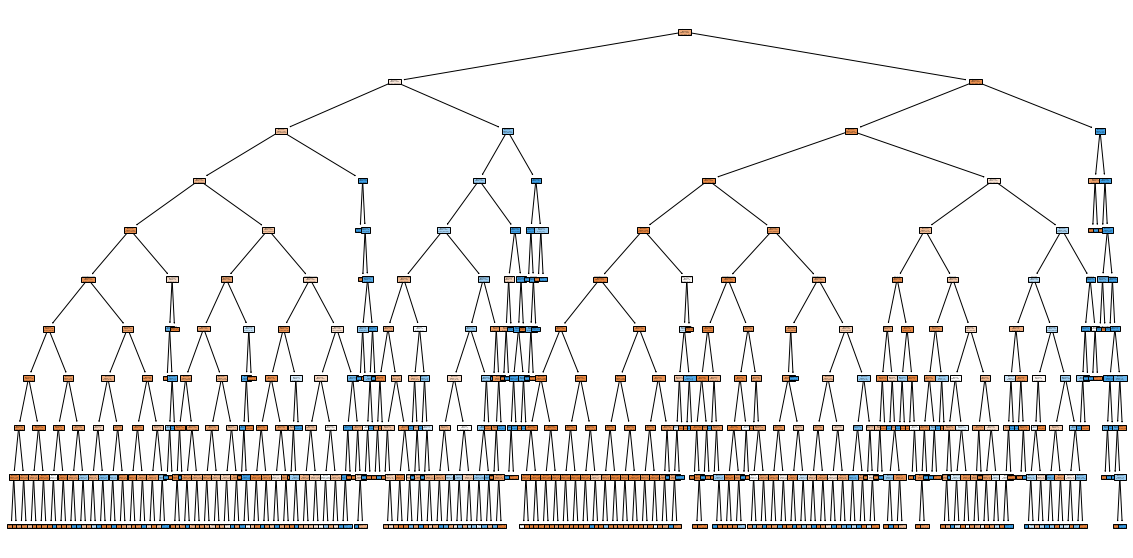

In [30]:
plt.figure(figsize=(20,10))
plot_tree(grid_search.best_estimator_,feature_names=x.columns,filled=True)

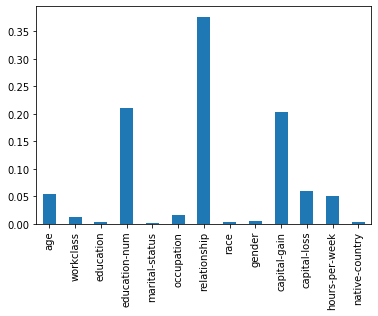

In [31]:
pd.Series(grid_search.best_estimator_.feature_importances_,index=x.columns).plot(kind='bar')

### Now we are asked to train our model from scratch again, but this time on the basis of max_leaf_nodes.

In [32]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [33]:
from sklearn.model_selection import GridSearchCV,StratifiedShuffleSplit

In [34]:
param_grid = {'max_leaf_nodes':range(1,len(x.columns))}
grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=StratifiedShuffleSplit(10))

In [35]:
grid_search.fit(x_train,y_train)

C:\Users\Himanshu Agarwal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Himanshu Agarwal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Himanshu Agarwal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Himanshu Agarwal\anaconda3\lib\site-packages\s

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=None,
            train_size=None),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
           

In [36]:
grid_search.best_params_

{'max_leaf_nodes': 12}

In [37]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
grid_search.best_score_

0.8428790786948177

[Text(508.17857142857144, 252.3857142857143, 'relationship <= 0.5\ngini = 0.366\nsamples = 26048\nvalue = [19775, 6273]'),
 Text(298.92857142857144, 213.55714285714288, 'education-num <= 11.5\ngini = 0.495\nsamples = 10586\nvalue = [5844, 4742]'),
 Text(179.35714285714286, 174.72857142857146, 'capital-gain <= 78.0\ngini = 0.442\nsamples = 7410\nvalue = [4970, 2440]'),
 Text(119.57142857142857, 135.9, 'education-num <= 7.5\ngini = 0.417\nsamples = 7056\nvalue = [4965, 2091]'),
 Text(59.785714285714285, 97.07142857142858, 'gini = 0.189\nsamples = 1193\nvalue = [1067, 126]'),
 Text(179.35714285714286, 97.07142857142858, 'age <= 18.5\ngini = 0.446\nsamples = 5863\nvalue = [3898, 1965]'),
 Text(119.57142857142857, 58.24285714285716, 'gini = 0.333\nsamples = 1880\nvalue = [1483, 397]'),
 Text(239.14285714285714, 58.24285714285716, 'hours-per-week <= 33.5\ngini = 0.477\nsamples = 3983\nvalue = [2415, 1568]'),
 Text(179.35714285714286, 19.41428571428571, 'gini = 0.198\nsamples = 368\nvalue = [

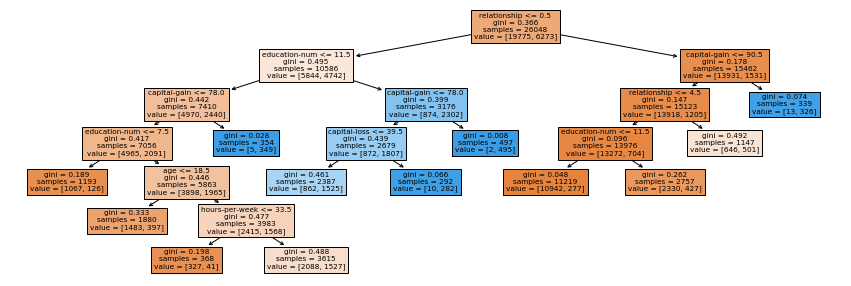

In [39]:
plt.figure(figsize=(15,5))
plot_tree(grid_search.best_estimator_,feature_names=x.columns,filled=True)

In [40]:
grid_search.cv_results_

{'mean_fit_time': array([0.00619171, 0.01698606, 0.01872146, 0.02088277, 0.02146852,
        0.02531016, 0.02586286, 0.02510285, 0.02579572, 0.02854722,
        0.0249177 , 0.03016009]),
 'std_fit_time': array([0.00758506, 0.00242371, 0.00526099, 0.00110767, 0.003148  ,
        0.00498173, 0.00426321, 0.00454312, 0.00465032, 0.00289358,
        0.00368368, 0.00083271]),
 'mean_score_time': array([0.00000000e+00, 1.85973644e-03, 4.99320030e-04, 2.21736431e-03,
        8.04495811e-04, 3.03077698e-04, 9.99689102e-05, 8.11934471e-04,
        1.61471367e-03, 1.23095512e-03, 5.67147732e-03, 4.21738625e-04]),
 'std_score_time': array([0.        , 0.00460826, 0.00080494, 0.00301683, 0.00241349,
        0.00064749, 0.00029991, 0.0024358 , 0.00322944, 0.00243688,
        0.00371287, 0.00084348]),
 'param_max_leaf_nodes': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, F

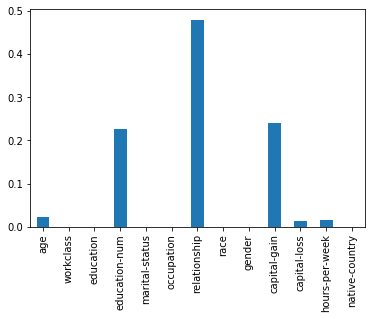

In [41]:
pd.Series(grid_search.best_estimator_.feature_importances_,index=x.columns).plot(kind='bar')

In [42]:
y_pred = grid_search.predict(x_test)

In [44]:
#Now since decision trees are classification models, lets look at confusion matrix and its values
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [45]:
confusion_matrix(y_test,y_pred)

array([[4718,  227],
       [ 801,  767]], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4945
           1       0.77      0.49      0.60      1568

    accuracy                           0.84      6513
   macro avg       0.81      0.72      0.75      6513
weighted avg       0.83      0.84      0.83      6513

